<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/image-classification/introduction-convnet.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(introduction-convnets)=
# Convnets - Convolutional Neural Networks

**Convolutional Neural Networks (CNNs)** are a class of deep learning models specifically designed for processing structured grid data, such as images. They are particularly effective for tasks like image classification, object detection, and segmentation.

We start with an example to illustrate the basic components of a CNN.  The following code demonstrates a simple CNN that classifies images from the MNIST dataset of handwritten digits. The model consists of several convolutional layers followed by fully connected layers.


In [1]:
from tensorflow import keras 
#from tensorflow.keras import layers 

# Input layer for 28x28 grayscale images
inputs = keras.Input(shape=(28, 28, 1))

# Convolutional layers
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Flattening before Dense layers
x = layers.Flatten()(x)

# Dense (fully-connected) output layer
outputs = layers.Dense(10, activation="softmax")(x)

# Define the model
model = keras.Model(inputs=inputs, outputs=outputs)

# View the model structure clearly
model.summary()


NameError: name 'layers' is not defined

In [36]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=0)


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test loss ", test_loss)
print("Test accuracy ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0325
Test loss  0.023203570395708084
Test accuracy  0.9930999875068665


##   Dense vs. Convolutional Layers

### **Dense (Fully-connected) Layers**
- **Global Patterns**: Dense layers learn patterns involving **all pixels at once**.
- **Example**:  
  Recognizing digits by overall patterns (e.g., "an image with two loops could be digit 8").

### **Convolutional Layers**
- **Local Patterns**: Convolutional layers learn patterns from **small regions (windows)** of the image, typically $3\times 3$.
- **Example**:  
  Detecting edges, curves, or intersections locally, like recognizing a vertical line or corner.

In the above example, we have the following layers: 

| Layer                   | Patterns learned                     | Example (MNIST digit recognition)                   |
|-------------------------|--------------------------------------|-----------------------------------------------------|
| Conv2D (filters=32)     | Simple local patterns (edges, lines) | Vertical edges, horizontal edges, small curves      |
| Conv2D (filters=64)     | More complex local patterns          | Corners, intersections, curved shapes               |
| Conv2D (filters=128)    | Richer, detailed local patterns      | Loops, combined shapes, parts of digits             |
| Flatten                 | Combines local features into vector  | Prepares local features for global interpretation   |
| Dense (10 neurons)      | Global patterns                      | Combines local features to classify digits globally |


- Convolutional layers excel at extracting local, spatial features efficiently.
- Dense layers integrate these extracted features globally for effective classification.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


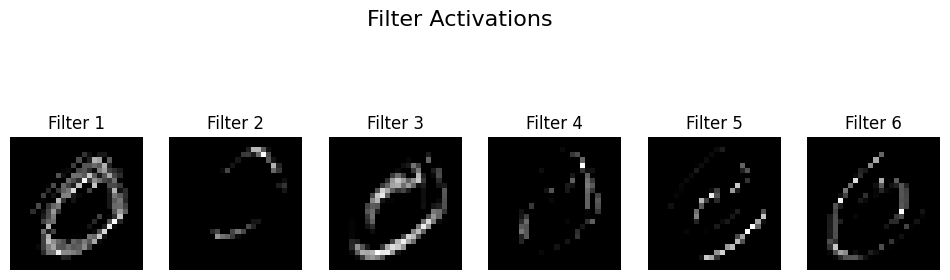

In [53]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input

# Load MNIST image
(train_images, _), _ = mnist.load_data()
img = train_images[1] / 255.0
img_input = img.reshape(1,28,28,1)

# Define convolutional model with 4 filters
inputs = Input(shape=(28,28,1))
conv = layers.Conv2D(100, kernel_size=3, activation='relu')(inputs)
model = Model(inputs, conv)

# Get feature maps
feature_maps = model.predict(img_input)

# Plot feature maps
fig, axes = plt.subplots(1, 6, figsize=(12,4))
for i in range(6):
    axes[i].imshow(feature_maps[0,:,:,i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')
plt.suptitle('Filter Activations', fontsize=16)
plt.show()


## Example: Convolution and the Sum of Two Dice


A fair die has 6 outcomes, each with probability $\frac{1}{6}$:

| Roll | Probability |
|------|-------------|
| 1    | $\frac{1}{6}$|
| 2    | $\frac{1}{6}$ |
| 3    | $\frac{1}{6}$ |
| 4    | $\frac{1}{6}$ |
| 5    | $\frac{1}{6}$ |
| 6    | $\frac{1}{6}$ |

When rolling **two dice**, the probability of each possible sum (from 2 to 12) is calculated using a **convolution**:

$$
P(X + Y = z) = \sum_k P(X = k) \cdot P(Y = z - k)
$$

| Sum | Combinations                                      | Number of Ways | Probability          |
|-----|---------------------------------------------------|----------------|----------------------|
| 2   | (1,1)                                             | 1              | $\frac{1}{36}$   |
| 3   | (1,2), (2,1)                                      | 2              | $\frac{2}{36}$   |
| 4   | (1,3), (2,2), (3,1)                               | 3              | $\frac{3}{36}$   |
| 5   | (1,4), (2,3), (3,2), (4,1)                        | 4              | $\frac{4}{36}$   |
| 6   | (1,5), (2,4), (3,3), (4,2), (5,1)                 | 5              | $\frac{5}{36}$   |
| 7   | (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)          | 6              | $\frac{6}{36}$   |
| 8   | (2,6), (3,5), (4,4), (5,3), (6,2)                 | 5              | $\frac{5}{36}$   |
| 9   | (3,6), (4,5), (5,4), (6,3)                        | 4              | $\frac{4}{36}$   |
| 10  | (4,6), (5,5), (6,4)                               | 3              | $\frac{3}{36}$   |
| 11  | (5,6), (6,5)                                      | 2              | $\frac{2}{36}$   |
| 12  | (6,6)                                             | 1              | $\frac{1}{36}$   |




Given two vectors (or sequences) $f$ and $g$, the **convolution** of $f$ and $g$ is a new vector defined mathematically as follows:

$$
(f * g)[n] = \sum_{k} f[k] \cdot g[n - k]
$$

- $f$ and $g$: The two input vectors being convolved.
- $(f * g)$: The convolution of $f$ and $g$.
- $(f * g)[n]$: The value at position $n$ in the resulting convolution vector.
- The summation runs over all indices $k$ for which both $f[k]$ and $g[n - k]$ are defined.

If the length of $f$ is $m$ and the length of $g$ is $n$, then the convolution $(f * g)$ has length:
$$
m + n - 1
$$

**Intuition**: The convolution operation is like sliding one vector over another, multiplying corresponding overlapping elements, and summing the products at each step. This operation appears frequently in probability, signal processing, and neural networks.


## Simple Convolution Example

Consider two short vectors:

- $f = [1, 2, 3]$
- $g = [4, 5]$

The convolution is defined as:

$$
(f * g)[n] = \sum_k f[k] \cdot g[n - k]
$$

Let's perform the convolution explicitly, step by step:

* **Step 1: $(f * g)[0]$**

$$
(f * g)[0] = f[0] \cdot g[0] = (1)(4) = 4
$$

* ***Step 2: $(f * g)[1]$**

$$
(f * g)[1] = f[0] \cdot g[1] + f[1] \cdot g[0] = (1)(5) + (2)(4) = 5 + 8 = 13
$$

* **Step 3: $(f * g)[2]$**

$$
(f * g)[2] = f[1] \cdot g[1] + f[2] \cdot g[0] = (2)(5) + (3)(4) = 10 + 12 = 22
$$

* **Step 4: $(f * g)[3]$**

$$
(f * g)[3] = f[2] \cdot g[1] = (3)(5) = 15
$$

* **Final Result:**

$$
f * g = [4, 13, 22, 15]
$$


In [39]:
import numpy as np

f = np.array([1, 2, 3])
g = np.array([4, 5])
# convolution 
print(f"{f}*{g} = {np.convolve(f, g, mode='full')}")


[1 2 3]*[4 5] = [ 4 13 22 15]


In [40]:

# probabilities of a single fair die
die = np.array([1/6]*6)

# convolution of two dice
sum_two_dice = np.convolve(die, die, mode='full')

print(sum_two_dice)


[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


In [41]:
die = np.array([1/6]*6)
bias_coin = [0.3, 0.7]
sum_pr = np.convolve(die, bias_coin, mode='full')

print(sum_pr)

print(np.sum(sum_pr))


[0.05       0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.11666667]
0.9999999999999999


##  2D Convolution: Mathematical Definition and Simple Example


Given two 2-dimensional arrays (matrices) $I$ (the input) and $K$ (the kernel), their **2D convolution** $(I * K)$ is defined mathematically as follows:

$$
(I * K)[x,y] = \sum_{m}\sum_{n} I[m,n] \cdot K[x - m,\, y - n]
$$

- Typically, the kernel $K$ is smaller than the input array $I$.
- The kernel is flipped horizontally and vertically in mathematical convolution before performing multiplication and summation.


Consider the following simple example:

**Input array $I$ (3×3)**:
$$
I = 
\begin{bmatrix}
1 & 2 & 1 \\
0 & 1 & 0 \\
2 & 1 & 3
\end{bmatrix}
$$

**Kernel $K$ (2×2)**:
$$
K =
\begin{bmatrix}
1 & 0 \\
-1 & 1
\end{bmatrix}
$$

First, remember convolution involves flipping the kernel both horizontally and vertically. Thus, the flipped kernel becomes:

$$
K_{\text{flipped}} =
\begin{bmatrix}
1 & -1 \\
0 & 1
\end{bmatrix}
$$

We slide the flipped kernel over the input array and perform element-wise multiplication and summation at each position.

* **Position (0,0)** (top-left):

$$
(1)(1) + (2)(-1) + (0)(0) + (1)(1) 
= 1 - 2 + 0 + 1 
= 0
$$

* **Position (0,1)** (top-middle):

$$
(2)(1) + (1)(-1) + (1)(0) + (0)(1) 
= 2 - 1 + 0 + 0 
= 1
$$

* **Position (1,0)** (middle-left):

$$
(0)(1) + (1)(-1) + (2)(0) + (1)(1) 
= 0 - 1 + 0 + 1 
= 0
$$

* **Position (1,1)** (middle-middle):

$$
(1)(1) + (0)(-1) + (1)(0) + (3)(1) 
= 1 + 0 + 0 + 3 
= 4
$$

Thus, clearly, the final convolution result (valid mode) is:

$$
I * K =
\begin{bmatrix}
0 & 1 \\
0 & 4
\end{bmatrix}
$$

- **2D Convolution**: Flip kernel, slide over the input, multiply corresponding elements, sum results at each step.
- Resulting matrix dimension (no padding): 
$$
(\text{input size}) - (\text{kernel size}) + 1
$$
- Each resulting number measures how strongly each region matches the kernel's pattern.

In [42]:
import numpy as np
from scipy.signal import convolve2d
from scipy.signal import correlate2d
image = np.array([
 [1, 2, 1], 
 [0, 1, 0],
 [2, 1, 3]
])

kernel = np.array([
    [1, 0],
    [-1, 1]
])

# Perform 2D convolution
result = convolve2d(image, kernel, mode='valid')

print("convolution\n", result)

result = correlate2d(image, kernel, mode='valid')
print("correlate\n",result)



convolution
 [[0 1]
 [0 4]]
correlate
 [[ 2  1]
 [-1  3]]


In [43]:
import numpy as np
from scipy.signal import convolve2d
from scipy.signal import correlate2d


# Example 5x5 input array (image)
image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 4],
    [1, 0, 1, 2, 3],
    [0, 1, 0, 1, 2],
    [3, 2, 1, 0, 1]
])

# Example 2x2 kernel
kernel = np.array([
    [1, 0],
    [-1, 1]
])

# Perform 2D convolution
result = convolve2d(image, kernel, mode='valid')

print(result)

result = correlate2d(image, kernel, mode='valid')
print(result)


[[ 0  1  6  3]
 [-1  0  1  2]
 [ 2 -1  0  1]
 [ 1  2 -1  0]]
[[ 2  3  4  1]
 [-1  2  3  4]
 [ 2 -1  2  3]
 [-1  0 -1  2]]


## Interpreting the 2D Convolution Result

Consider this example:

**Input image (5×5):**
```
[[1, 2, 3, 0, 1],
 [0, 1, 2, 3, 4],
 [1, 0, 1, 2, 3],
 [0, 1, 0, 1, 2],
 [3, 2, 1, 0, 1]]
```

**Kernel (2×2):**
```
[[ 1,  0],
 [-1,  1]]
```

###  **What exactly does the convolution result represent?**

Each element in the convolution output (feature map) represents **how strongly the local region in the input image matches the kernel's pattern**:

- **High positive value:** Strong match with kernel pattern.
- **Value near zero:** No significant match.
- **Negative value:** Strong match with the inverse (opposite) of the kernel pattern.


### **What pattern does this kernel recognize?**

This kernel:
```
[[ 1,  0],
 [-1,  1]]
```

detects a very specific local **diagonal contrast pattern**:

| Position       | Expected brightness |
|----------------|---------------------|
| Top-left       | Bright (positive)   |
| Top-right      | Ignored (zero)      |
| Bottom-left    | Dark (negative)     |
| Bottom-right   | Bright (positive)   |

Visually, it recognizes this arrangement of brightness:
```
Bright   | Ignored
---------|---------
Dark     | Bright
```

Thus, this kernel clearly identifies regions in the image that exhibit a diagonal brightness contrast (bright diagonally from top-left to bottom-right, with darkness at bottom-left).

 
Summarizing:    
- Convolution kernels act like **small "pattern detectors"**.
- Each convolution output shows you **exactly where in the image** the specific pattern appears most strongly.
- Convolutional Neural Networks learn such kernels automatically, allowing them to detect meaningful visual features and patterns in images.


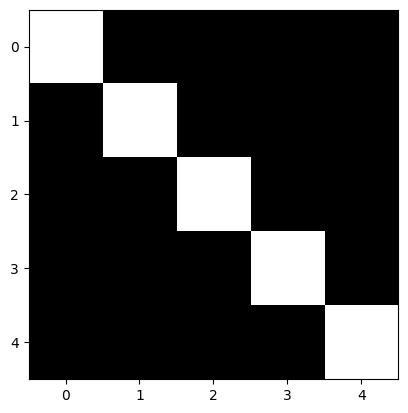

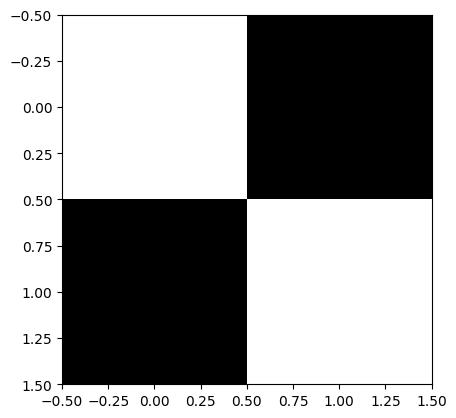

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]


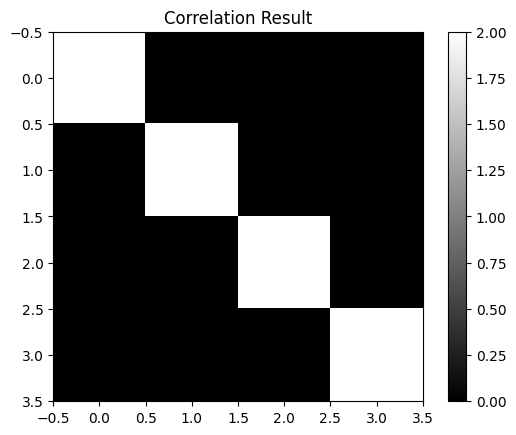

In [54]:
image = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
])

plt.imshow(image, cmap='gray')
plt.show()

# Example 2x2 kernel
kernel = np.array([
    [1, 0],
    [0, 1]
])

plt.imshow(kernel, cmap='gray')
plt.show()


result = correlate2d(image, kernel, mode='valid')
print(result)
plt.imshow(result, cmap='gray')
plt.title('Correlation Result')
plt.colorbar()
plt.show()


| Kernel                       | Pattern Detected                     | Use Case                        |
|------------------------------|--------------------------------------|---------------------------------|
| `[[1,1],[1,1]]`              | Uniform 2×2 bright block             | Detecting blobs or flat regions |
| `[[0,0],[0,0]]`              | Nothing (zero everywhere)            | Theoretical/diagnostic          |
| `[[1,0],[0,1]]`              | Diagonal (top-left to bottom-right) | Detecting `/` diagonals         |
| `[[0,1],[1,0]]`              | Diagonal (top-right to bottom-left) | Detecting `\` diagonals         |


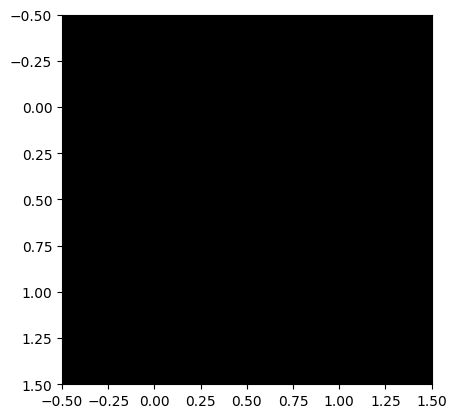

[[2 1 0 0]
 [1 2 1 0]
 [0 1 2 1]
 [0 0 1 2]]


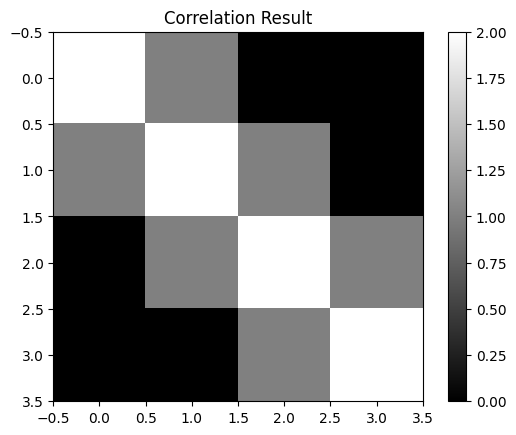

In [58]:
# Example 2x2 kernel
kernel = np.array([
    [1, 1],
    [1, 1]
])

plt.imshow(kernel, cmap='gray')
plt.show()


result = correlate2d(image, kernel, mode='valid')
print(result)
plt.imshow(result, cmap='gray')
plt.title('Correlation Result')
plt.colorbar()
plt.show()


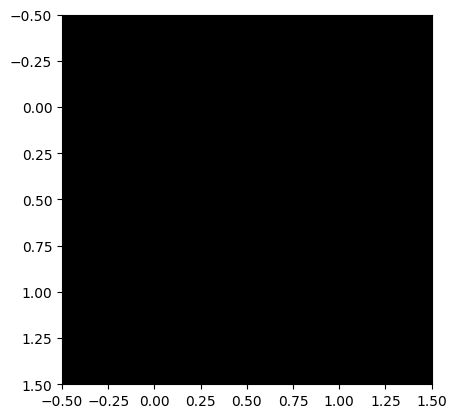

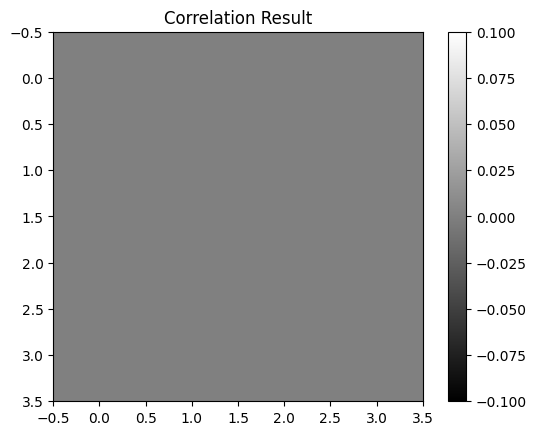

In [46]:
# Example 2x2 kernel
kernel = np.array([
    [0, 0],
    [0, 0]
])

plt.imshow(kernel, cmap='gray')
plt.show()


result = correlate2d(image, kernel, mode='valid')

plt.imshow(result, cmap='gray')
plt.title('Correlation Result')
plt.colorbar()
plt.show()


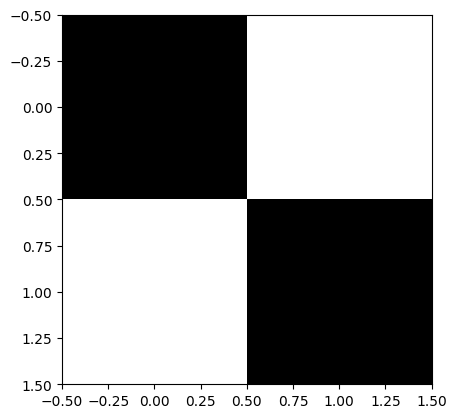

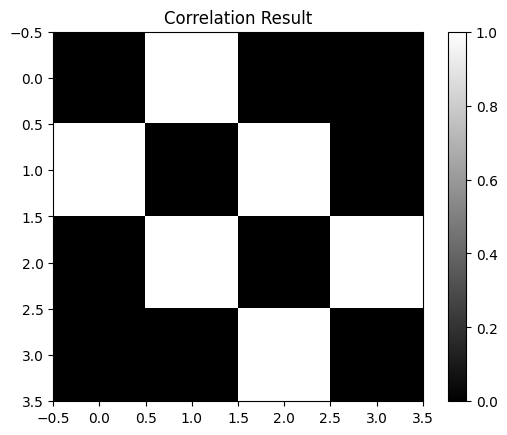

In [47]:
# Example 2x2 kernel
kernel = np.array([
    [0, 1],
    [1, 0]
])

plt.imshow(kernel, cmap='gray')
plt.show()


result = correlate2d(image, kernel, mode='valid')

plt.imshow(result, cmap='gray')
plt.title('Correlation Result')
plt.colorbar()
plt.show()


## Max Pooling


**MaxPooling2D** is an operation in convolutional neural networks (CNNs) that reduces the spatial dimensions (width and height) of feature maps by summarizing local regions.

### How MaxPooling2D Works:

Given a feature map, MaxPooling divides it into smaller regions (typically $2 \times 2$) and selects the **maximum value** from each region.

### Example:

Suppose we have a $4 \times 4$ feature map:

$$
\begin{bmatrix}
1 & 3 & 2 & 1 \\[6pt]
4 & 6 & 5 & 2 \\[6pt]
7 & 8 & 9 & 3 \\[6pt]
4 & 5 & 2 & 1
\end{bmatrix}
$$

We apply a MaxPooling operation with a $2\times2$ pooling region and stride = $2$. This divides the feature map into four distinct regions:

- **Region 1 (top-left):**  
$$
\begin{bmatrix}
1 & 3 \\[6pt]
4 & 6
\end{bmatrix}
\quad\Rightarrow\quad \max(1, 3, 4, 6) = 6
$$

- **Region 2 (top-right):**  
$$
\begin{bmatrix}
2 & 1 \\[6pt]
5 & 2
\end{bmatrix}
\quad\Rightarrow\quad \max(2, 1, 5, 2) = 5
$$

- **Region 3 (bottom-left):**  
$$
\begin{bmatrix}
7 & 8 \\[6pt]
4 & 5
\end{bmatrix}
\quad\Rightarrow\quad \max(7, 8, 4, 5) = 8
$$

- **Region 4 (bottom-right):**  
$$
\begin{bmatrix}
9 & 3 \\[6pt]
2 & 1
\end{bmatrix}
\quad\Rightarrow\quad \max(9, 3, 2, 1) = 9
$$

### Resulting Feature Map:

After MaxPooling, the resulting feature map is smaller ($2\times2$):

$$
\begin{bmatrix}
6 & 5 \\[6pt]
8 & 9
\end{bmatrix}
$$

### Why Use MaxPooling2D?

- **Reduces complexity** by decreasing the dimensions of the feature map.
- **Highlights dominant features** by keeping the maximum values.


In [48]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [49]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype("float32") / 255

model_no_max_pool.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model_no_max_pool.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=0)

test_loss, test_acc = model_no_max_pool.evaluate(test_images, test_labels)
print("Test loss ", test_loss)
print("Test accuracy ", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9805 - loss: 0.0778
Test loss  0.06550324708223343
Test accuracy  0.9829999804496765
